In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [52]:
df = pd.read_csv('winequality1.csv')
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     0            7.0              0.27         0.36            20.7   
1     0            6.3              0.30         0.34             1.6   
2     0            8.1              0.28         0.40             6.9   
3     0            7.2              0.23         0.32             8.5   
4     0            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [49]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null int64
fixed acidity           6487 non-null float64
volatile acidity        6489 non-null float64
citric acid             6494 non-null float64
residual sugar          6495 non-null float64
chlorides               6495 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6488 non-null float64
sulphates               6493 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [53]:
df.describe()

type  fixed acidity  volatile acidity  citric acid  \
count  6497.000000    6487.000000       6489.000000  6494.000000   
mean      0.246114       7.216579          0.339691     0.318722   
std       0.430779       1.296750          0.164649     0.145265   
min       0.000000       3.800000          0.080000     0.000000   
25%       0.000000       6.400000          0.230000     0.250000   
50%       0.000000       7.000000          0.290000     0.310000   
75%       0.000000       7.700000          0.400000     0.390000   
max       1.000000      15.900000          1.580000     1.660000   

       residual sugar    chlorides  free sulfur dioxide  total sulfur dioxide  \
count     6495.000000  6495.000000          6497.000000           6497.000000   
mean         5.444326     0.056042            30.525319            115.744574   
std          4.758125     0.035036            17.749400             56.521855   
min          0.600000     0.009000             1.000000              6.000000   
25%          1.800000     0.038000            17.000000             77.000000   
50%          3.000000     0.047000            29.000000            118.000000   
75%          8.100000     0.065000            41.000000            156.000000   
max         65.800000     0.611000           289.000000            440.000000   

           density           pH    sulphates      alcohol      quality  
count  6497.000000  6488.000000  6493.000000  6497.000000  6497.000000  
mean      0.994697     3.218395     0.531215    10.491801     5.818378  
std       0.002999     0.160748     0.148814     1.192712     0.873255  
min       0.987110     2.720000     0.220000     8.000000     3.000000  
25%       0.992340     3.110000     0.430000     9.500000     5.000000  
50%       0.994890     3.210000     0.510000    10.300000     6.000000  
75%       0.996990     3.320000     0.600000    11.300000     6.000000  
max       1.038980     4.010000     2.000000    14.900000     9.000000

In [54]:
# check for null values
df.isnull().sum()



type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [56]:
# fill the missing values
for col, value in df.items():
    if col != 'type':
        df[col] = df[col].fillna(df[col].mean())

In [18]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [19]:
num_features=12

In [36]:
X = df.drop('quality',axis=1)
y=df['quality']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

In [38]:
model = Sequential()
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [23]:
#training

In [39]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400, callbacks=[early_stop])

Epoch 1/400
39/39 [==============================] - 1s 4ms/step - loss: 35.7233 - val_loss: 34.0980
Epoch 2/400
39/39 [==============================] - 0s 2ms/step - loss: 34.3330 - val_loss: 33.6392
Epoch 3/400
39/39 [==============================] - 0s 2ms/step - loss: 33.6413 - val_loss: 33.1996
Epoch 4/400
39/39 [==============================] - 0s 1ms/step - loss: 33.1437 - val_loss: 32.7641
Epoch 5/400
39/39 [==============================] - 0s 2ms/step - loss: 32.6842 - val_loss: 32.3315
Epoch 6/400
39/39 [==============================] - 0s 2ms/step - loss: 32.2423 - val_loss: 31.9032
Epoch 7/400
39/39 [==============================] - 0s 2ms/step - loss: 31.8128 - val_loss: 31.4787
Epoch 8/400
39/39 [==============================] - 0s 2ms/step - loss: 31.3908 - val_loss: 31.0593
Epoch 9/400
39/39 [==============================] - 0s 2ms/step - loss: 30.9721 - val_loss: 30.6446
Epoch 10/400
39/39 [==============================] - 0s 2ms/step - loss: 30.5565 - val_los

39/39 [==============================] - 0s 2ms/step - loss: 9.9188 - val_loss: 9.7299
Epoch 82/400
39/39 [==============================] - 0s 3ms/step - loss: 9.7322 - val_loss: 9.5448
Epoch 83/400
39/39 [==============================] - 0s 3ms/step - loss: 9.5470 - val_loss: 9.3609
Epoch 84/400
39/39 [==============================] - 0s 3ms/step - loss: 9.3645 - val_loss: 9.1797
Epoch 85/400
39/39 [==============================] - 0s 2ms/step - loss: 9.1851 - val_loss: 9.0018
Epoch 86/400
39/39 [==============================] - 0s 2ms/step - loss: 9.0071 - val_loss: 8.8253
Epoch 87/400
39/39 [==============================] - 0s 2ms/step - loss: 8.8325 - val_loss: 8.6527
Epoch 88/400
39/39 [==============================] - 0s 2ms/step - loss: 8.6607 - val_loss: 8.4817
Epoch 89/400
39/39 [==============================] - 0s 3ms/step - loss: 8.4905 - val_loss: 8.3132
Epoch 90/400
39/39 [==============================] - 0s 2ms/step - loss: 8.3227 - val_loss: 8.1469
Epoch 91/400


39/39 [==============================] - 0s 1ms/step - loss: 1.5234 - val_loss: 1.4278
Epoch 163/400
39/39 [==============================] - 0s 1ms/step - loss: 1.4881 - val_loss: 1.3937
Epoch 164/400
39/39 [==============================] - 0s 1ms/step - loss: 1.4543 - val_loss: 1.3603
Epoch 165/400
39/39 [==============================] - 0s 1ms/step - loss: 1.4213 - val_loss: 1.3282
Epoch 166/400
39/39 [==============================] - 0s 2ms/step - loss: 1.3899 - val_loss: 1.2975
Epoch 167/400
39/39 [==============================] - 0s 2ms/step - loss: 1.3597 - val_loss: 1.2680
Epoch 168/400
39/39 [==============================] - 0s 2ms/step - loss: 1.3304 - val_loss: 1.2392
Epoch 169/400
39/39 [==============================] - 0s 2ms/step - loss: 1.3017 - val_loss: 1.2112
Epoch 170/400
39/39 [==============================] - 0s 1ms/step - loss: 1.2743 - val_loss: 1.1845
Epoch 171/400
39/39 [==============================] - 0s 2ms/step - loss: 1.2481 - val_loss: 1.1590
Epoc

39/39 [==============================] - 0s 1ms/step - loss: 0.7382 - val_loss: 0.6468
Epoch 244/400
39/39 [==============================] - 0s 1ms/step - loss: 0.7260 - val_loss: 0.6401
Epoch 245/400
39/39 [==============================] - 0s 1ms/step - loss: 0.7322 - val_loss: 0.6380
Epoch 246/400
39/39 [==============================] - 0s 1ms/step - loss: 0.7374 - val_loss: 0.6402
Epoch 247/400
39/39 [==============================] - 0s 1ms/step - loss: 0.7327 - val_loss: 0.6369
Epoch 248/400
39/39 [==============================] - 0s 1ms/step - loss: 0.7307 - val_loss: 0.6359
Epoch 249/400
39/39 [==============================] - 0s 2ms/step - loss: 0.7286 - val_loss: 0.6329
Epoch 250/400
39/39 [==============================] - 0s 1ms/step - loss: 0.7320 - val_loss: 0.6337
Epoch 251/400
39/39 [==============================] - 0s 1ms/step - loss: 0.7304 - val_loss: 0.6296
Epoch 252/400
39/39 [==============================] - 0s 1ms/step - loss: 0.7266 - val_loss: 0.6227
Epoc

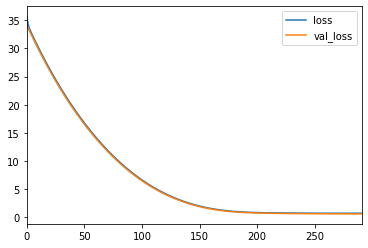

In [40]:
losses = pd.DataFrame(model.history.history)
losses.plot()

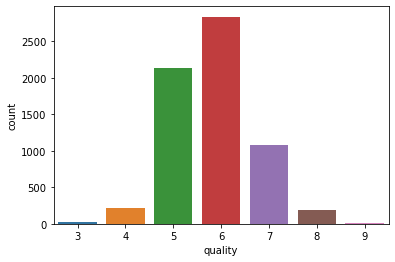

In [42]:
import seaborn as sns
sns.countplot(df['quality'])

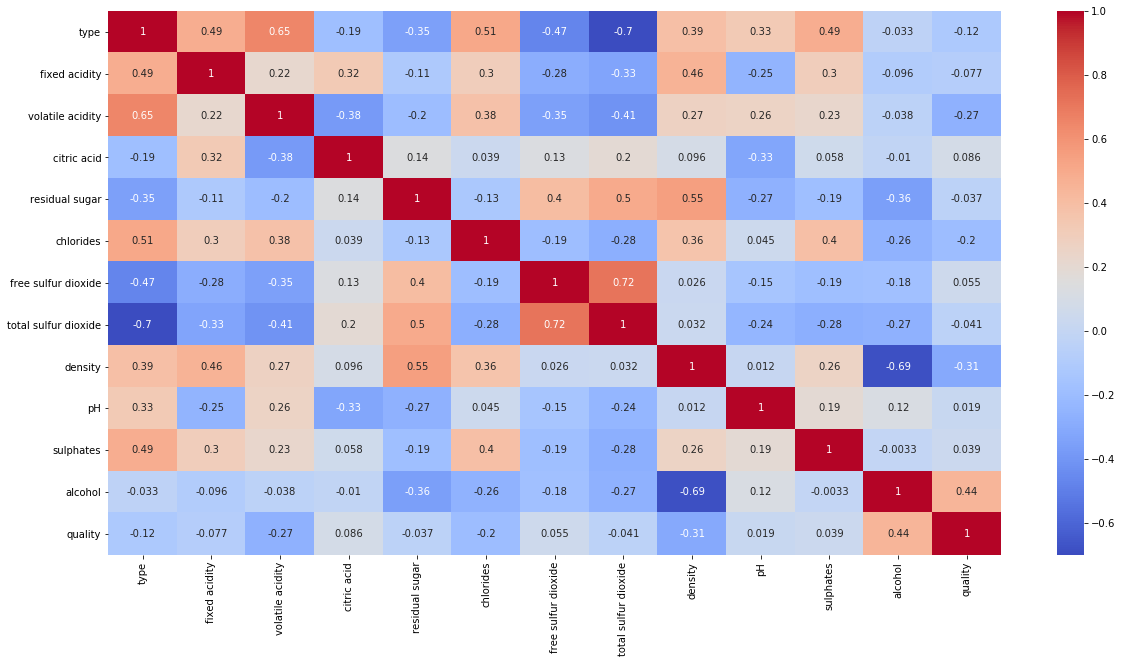

In [43]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [44]:
X_test123=np.array([1,9,0.16,0.4,10,0.044,48,103,1.001,3.54,1.2,14])
a=X_test123.reshape(1,-1)

In [45]:
predictions1 = model.predict(a)
print(predictions1)

[[5.9631896]]
